Churn Rate by Charge Group:
Churn               No        Yes
ChargeGroup                      
High         66.006724  33.993276
Medium       70.430337  29.569663
Low          86.874690  13.125310


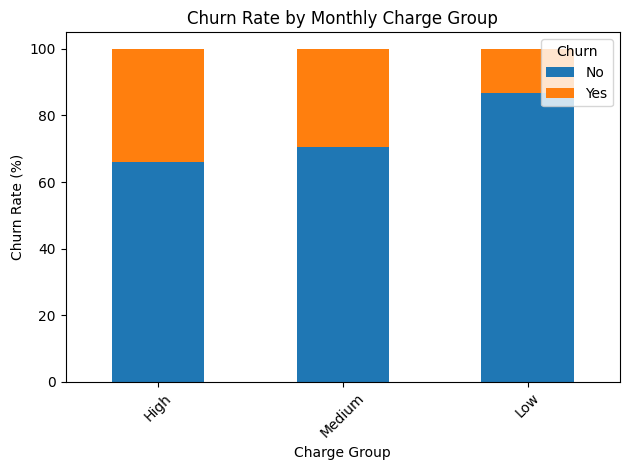

Churn Rate by Internet Service:
Churn                   No        Yes
InternetService                      
Fiber optic      58.107235  41.892765
DSL              81.040892  18.959108
No               92.595020   7.404980


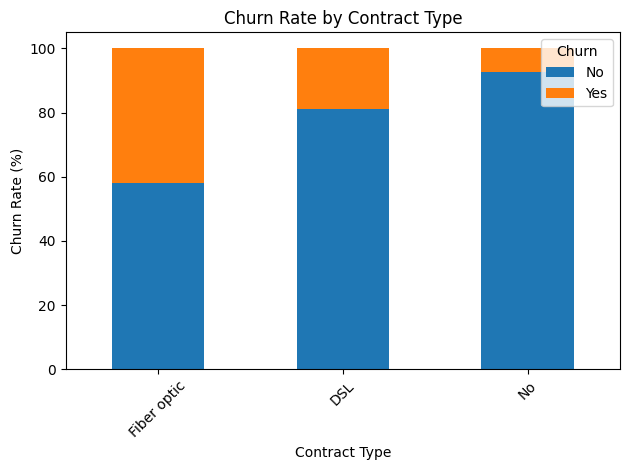

Interpretation of the churn rate by Internet Service
Customers with Fiber Optic Internet Service have the highest churn rate, indicating potential dissatisfaction with this service type. In contrast, those with DSL or No Internet Service show lower churn rates, suggesting greater retention among these groups.
Churn Rate by Payment Method:
Churn                             No        Yes
PaymentMethod                                  
Electronic check           54.714588  45.285412
Mailed check               80.893300  19.106700
Bank transfer (automatic)  83.290155  16.709845
Credit card (automatic)    84.756899  15.243101


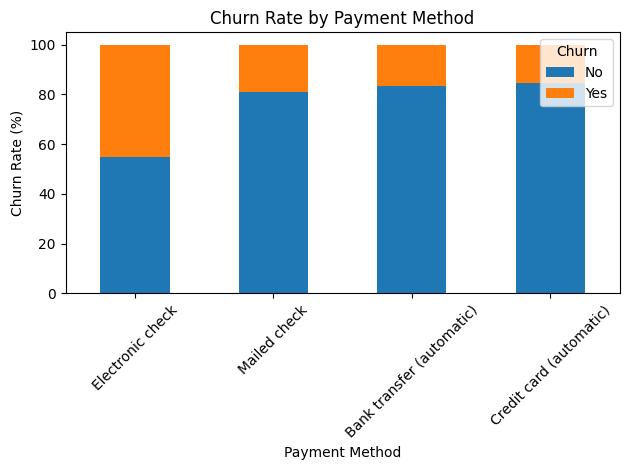

Interpretation of the churn rate by Payment Method
Customers using Electronic Check as a payment method exhibit the highest churn rate, indicating potential issues with this payment option. In contrast, those using Bank Transfer (Automatic) or Credit Card (Automatic) show significantly lower churn rates, suggesting these methods are more favorable for customer retention.
Churn Rate by Tech Support:
Churn                       No        Yes
TechSupport                              
No                   58.364526  41.635474
Yes                  84.833659  15.166341
No internet service  92.595020   7.404980


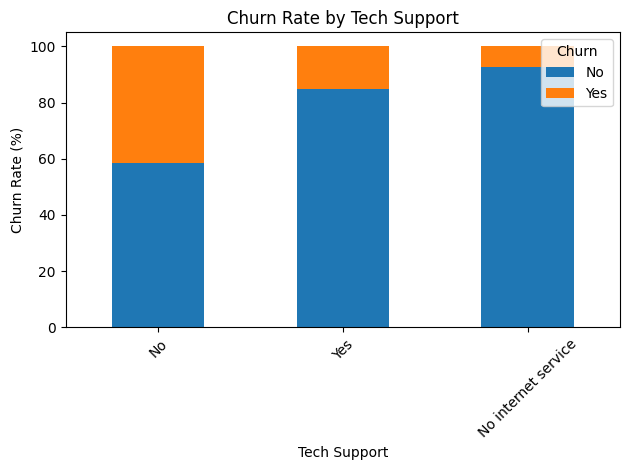

Interpretation of the churn rate by Tech Support
Customers who do not have Tech Support show a significantly higher churn rate compared to those who do. This suggests that providing Tech Support is crucial for customer retention, as it likely enhances customer satisfaction and reduces the likelihood of churn.
Churn Rate by Tenure:
Churn            No        Yes
tenure                        
[0, 12)   51.715805  48.284195
[12, 24)  70.487106  29.512894
[24, 36)  77.968037  22.031963
[36, 48)  80.481283  19.518717
[48, 60)  85.000000  15.000000
[60, 72)  91.703836   8.296164


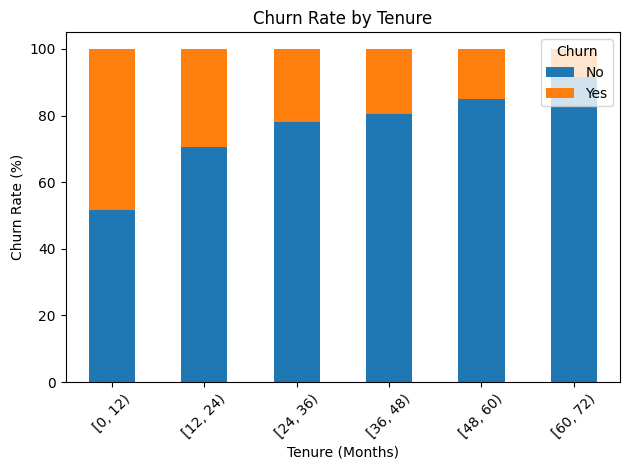

Interpretation of the churn rate by Tenure
Churn rates decrease significantly with increasing tenure. Customers with less than 12 months of tenure exhibit the highest churn rate, while those with 60 months or more show the lowest. This indicates that longer-tenured customers are more likely to remain loyal, suggesting that retention strategies should focus on early-stage customers to reduce churn.


In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv('../data/telco_churn.csv')

def churn_rate_by_category(df, category):    
    return (
        df['Churn']
        .groupby(df[category])
        .value_counts(normalize=True)
        .unstack() * 100        
    ).sort_values(by='Yes', ascending=False)


PaymentMethod_churn = churn_rate_by_category(df, 'PaymentMethod')
InternetService_churn = churn_rate_by_category(df, 'InternetService')
TechSupport_churn = churn_rate_by_category(df, 'TechSupport')

Tenure_churn = (
    df['Churn']
    .groupby(pd.cut(df['tenure'], bins=[0, 12, 24, 36, 48, 60, 72], right=False), observed=False)
    .value_counts(normalize=True)
    .unstack() * 100    
).sort_values(by='Yes', ascending=False)

# For bucketing MontlyCharges into Low, Medium, High
def charge_bucket(charge):
    if charge < 45:
        return 'Low'
    elif charge < 80:
        return 'Medium'
    else:
        return 'High'
df['ChargeGroup'] = df['MonthlyCharges'].apply(charge_bucket)
ChargeGroup_churn = churn_rate_by_category(df, 'ChargeGroup')

# Churn Rate by Monthly Charge Group
print("Churn Rate by Charge Group:")
print(ChargeGroup_churn)
ChargeGroup_churn.plot(kind='bar', stacked=True)
plt.title('Churn Rate by Monthly Charge Group')
plt.xlabel('Charge Group')
plt.ylabel('Churn Rate (%)')
plt.xticks(rotation=45)
plt.legend(title='Churn', loc='upper right')
plt.tight_layout()
plt.show()


#Visualization

# Churn Rate by Internet Service
print("Churn Rate by Internet Service:")
print(InternetService_churn)
InternetService_churn.plot(kind='bar', stacked=True)
plt.title('Churn Rate by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Churn Rate (%)')
plt.xticks(rotation=45)
plt.legend(title='Churn', loc='upper right')
plt.tight_layout()
plt.show()
print('Interpretation of the churn rate by Internet Service')
print("Customers with Fiber Optic Internet Service have the highest churn rate, indicating potential dissatisfaction with this service type. In contrast, those with DSL or No Internet Service show lower churn rates, suggesting greater retention among these groups.")



# Churn Rate by Payment Method
print("Churn Rate by Payment Method:")
print(PaymentMethod_churn)
PaymentMethod_churn.plot(kind='bar', stacked=True)
plt.title('Churn Rate by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Churn Rate (%)')
plt.xticks(rotation=45)
plt.legend(title='Churn', loc='upper right')
plt.tight_layout()
plt.show()
print('Interpretation of the churn rate by Payment Method')
print("Customers using Electronic Check as a payment method exhibit the highest churn rate, indicating potential issues with this payment option. In contrast, those using Bank Transfer (Automatic) or Credit Card (Automatic) show significantly lower churn rates, suggesting these methods are more favorable for customer retention.")

# Churn Rate by Tech Support
print("Churn Rate by Tech Support:")
print(TechSupport_churn)
TechSupport_churn.plot(kind='bar', stacked=True)
plt.title('Churn Rate by Tech Support')
plt.xlabel('Tech Support')
plt.ylabel('Churn Rate (%)')
plt.xticks(rotation=45)
plt.legend(title='Churn', loc='upper right')
plt.tight_layout()
plt.show()
print('Interpretation of the churn rate by Tech Support')
print("Customers who do not have Tech Support show a significantly higher churn rate compared to those who do. This suggests that providing Tech Support is crucial for customer retention, as it likely enhances customer satisfaction and reduces the likelihood of churn.")

# Churn Rate by Tenure
print("Churn Rate by Tenure:")
print(Tenure_churn)
Tenure_churn.plot(kind='bar', stacked=True)
plt.title('Churn Rate by Tenure')
plt.xlabel('Tenure (Months)')
plt.ylabel('Churn Rate (%)')
plt.xticks(rotation=45)
plt.legend(title='Churn', loc='upper right')
plt.tight_layout()
plt.show()
print('Interpretation of the churn rate by Tenure')
print("Churn rates decrease significantly with increasing tenure. Customers with less than 12 months of tenure exhibit the highest churn rate, while those with 60 months or more show the lowest. This indicates that longer-tenured customers are more likely to remain loyal, suggesting that retention strategies should focus on early-stage customers to reduce churn.")






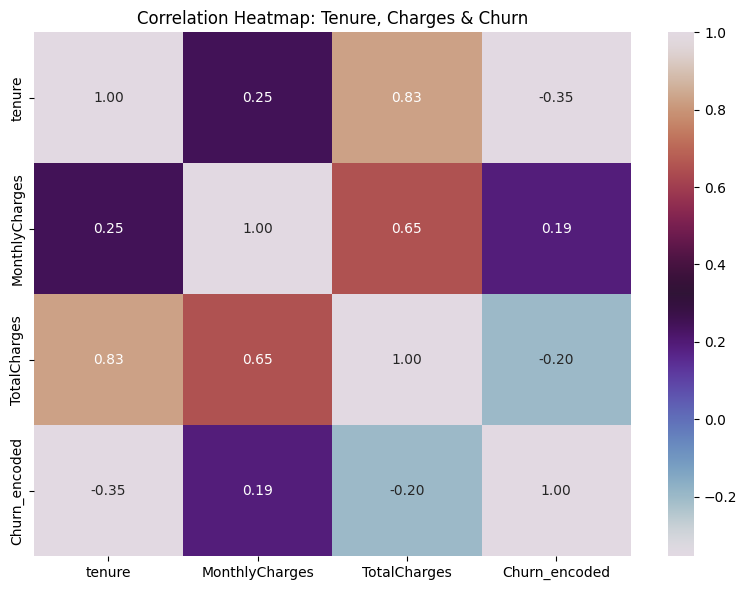

In [22]:
# Heatmap of Churn Rate by tenure, MonthlyCharges & TotalCharges

# Clean TotalCharges
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Remove rows where TotalCharges couldn't be converted
df = df.dropna(subset=['TotalCharges'])

df['Churn_encoded'] = df['Churn'].map({'Yes': 1, 'No': 0})
# churn_heatmap_data = df.groupby(['tenure', 'MonthlyCharges','TotalCharges'])['Churn_encoded'].mean().unstack()
# plt.figure(figsize=(12, 8))
# plt.title('Heatmap of Churn Rate by Tenure, Monthly Charges & Total Charges')
# plt.xlabel('Monthly Charges')
# plt.ylabel('Tenure (Months)')
# plt.imshow(churn_heatmap_data, aspect='auto', cmap='coolwarm', interpolation='nearest')
# plt.colorbar(label='Churn Rate')
# plt.xticks(range(len(churn_heatmap_data.columns)), churn_heatmap_data.columns, rotation=45)
# plt.yticks(range(len(churn_heatmap_data.index)), churn_heatmap_data.index)
# plt.tight_layout()
# plt.show()


corr_cols = ['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn_encoded']
corr_matrix = df[corr_cols].corr()

#visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='twilight', fmt=".2f")
plt.title("Correlation Heatmap: Tenure, Charges & Churn")
plt.tight_layout()
plt.show()



# Introduction

## Exploratory Data Analysis

### Analysing the factors changing the Churn rate for an organization